# Classification Demo

Week 2- Day 3


___________________________________

<b>This data is based on Telco churn dataset found on Kaggle

In [1]:
#import needed libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data

#import ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.model_selection import train_test_split #train, test, split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Acquire

Plan --- **Acquire** --- Prepare --- Explore --- Model --- Deliver

In [3]:
# acquire
from env import host, user, password
import acquire

In [4]:
# call acquire function and take a look at data
df = acquire.get_telco_churn_data()

In [5]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,2,Mailed check,1,DSL
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,4,Credit card (automatic),1,DSL
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,3,Bank transfer (automatic),1,DSL
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,4,Credit card (automatic),1,DSL
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,3,Bank transfer (automatic),1,DSL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

<hr style="border:2px solid black"> </hr>

# Prepare

Plan --- Acquire --- **Prepare** --- Explore --- Model --- Deliver

In [7]:
import prepare

In [8]:
#reassign prep_telco_churn(df) to just df
df = prepare.prep_telco_churn(df)

In [9]:
#call df and look at it
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0016-QLJIS,Female,0,1,1,65,1,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.90,0,Two year,Mailed check,DSL
1,0017-DINOC,Male,0,0,0,54,0,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,0,Two year,Credit card (automatic),DSL
2,0019-GFNTW,Female,0,0,0,56,0,No phone service,1,Yes,...,No,3,No,3,45.05,2560.10,0,Two year,Bank transfer (automatic),DSL
3,0056-EPFBG,Male,0,1,1,20,0,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.40,0,Two year,Credit card (automatic),DSL
4,0078-XZMHT,Male,0,1,0,72,1,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.20,0,Two year,Bank transfer (automatic),DSL


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   int64  
 4   dependents                7043 non-null   int64  
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   int64  
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [11]:
#import split function from prepare.py 
train, validate, test = prepare.telco_split(df)

In [12]:
print(f'train shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

train shape: (3943, 24)
validate shape: (1691, 24)
test shape: (1409, 24)


<hr style="border:2px solid black"> </hr>

# Explore

Plan --- Acquire --- Prepare --- **Explore** --- Model --- Deliver

In [13]:
#take a look at the data
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
4604,5564-NEMQO,Female,1,0,0,1,1,No,2,No,...,No,1,Yes,3,75.30,75.30,1,Month-to-month,Bank transfer (automatic),Fiber optic
5566,0825-CPPQH,Female,0,1,0,71,1,No,3,No internet service,...,No internet service,3,No,4,19.10,1372.45,0,Two year,Credit card (automatic),None
6204,1561-BWHIN,Male,0,1,1,19,1,No,3,No internet service,...,No internet service,2,No,2,19.80,344.50,0,One year,Mailed check,None
5837,4979-HPRFL,Male,0,1,1,56,1,Yes,3,No internet service,...,No internet service,3,No,3,24.15,1402.25,0,Two year,Bank transfer (automatic),None
1276,0749-IRGQE,Female,1,1,0,13,0,No phone service,1,No,...,Yes,1,No,1,45.30,528.45,0,Month-to-month,Electronic check,DSL


In [14]:
#data has int and object data types
#look at column names
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6958
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               3943 non-null   object 
 1   gender                    3943 non-null   object 
 2   senior_citizen            3943 non-null   int64  
 3   partner                   3943 non-null   int64  
 4   dependents                3943 non-null   int64  
 5   tenure                    3943 non-null   int64  
 6   phone_service             3943 non-null   int64  
 7   multiple_lines            3943 non-null   object 
 8   internet_service_type_id  3943 non-null   int64  
 9   online_security           3943 non-null   object 
 10  online_backup             3943 non-null   object 
 11  device_protection         3943 non-null   object 
 12  tech_support              3943 non-null   object 
 13  streaming_tv              3943 non-null   object 
 14  strea

In [16]:
#we are trying to determine churn... look into that
train.churn.value_counts()

#this shows 26.88% of customers in the train data set churn (1060 out of 3943)

0    2883
1    1060
Name: churn, dtype: int64

In [17]:
#find correlation- I think age correlates the most to churn
telco_correlation = train.corr()
telco_correlation
#this shows that senior_citizen and monthly_charges have the highest pos corr with churn

,senior_citizen,partner,dependents,tenure,phone_service,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.012701,-0.218198,0.007828,0.013019,-0.024178,-0.148452,-0.072364,0.219926,0.095401,0.154017
partner,0.012701,1.000000,0.455588,0.391101,0.036104,0.019787,0.304812,0.146418,0.102342,0.332477,-0.155450
dependents,-0.218198,0.455588,1.000000,0.158213,0.016223,0.047441,0.233309,0.117953,-0.103481,0.068036,-0.161894
tenure,0.007828,0.391101,0.158213,1.000000,0.006999,-0.040669,0.673449,0.368140,0.239707,0.825686,-0.350872
phone_service,0.013019,0.036104,0.016223,0.006999,1.000000,0.386842,0.000437,-0.003436,0.242612,0.110498,0.019686
internet_service_type_id,-0.024178,0.019787,0.047441,-0.040669,0.386842,1.000000,0.098270,0.002460,-0.329914,-0.187585,-0.048956
contract_type_id,-0.148452,0.304812,0.233309,0.673449,0.000437,0.098270,1.000000,0.370144,-0.079685,0.448854,-0.395606
payment_type_id,-0.072364,0.146418,0.117953,0.368140,-0.003436,0.002460,0.370144,1.000000,-0.054415,0.254743,-0.243537
monthly_charges,0.219926,0.102342,-0.103481,0.239707,0.242612,-0.329914,-0.079685,-0.054415,1.000000,0.645040,0.212429
total_charges,0.095401,0.332477,0.068036,0.825686,0.110498,-0.187585,0.448854,0.254743,0.645040,1.000000,-0.189770


In [18]:
#this gives the all the correlation with JUST churn
telco_corr_churn = telco_correlation['churn'].sort_values(ascending=False)
telco_corr_churn

## again, senior_citizen is the second highest
##THIS will indict my DRIVER of churn!!

churn                       1.000000
monthly_charges             0.212429
senior_citizen              0.154017
phone_service               0.019686
internet_service_type_id   -0.048956
partner                    -0.155450
dependents                 -0.161894
total_charges              -0.189770
payment_type_id            -0.243537
tenure                     -0.350872
contract_type_id           -0.395606
Name: churn, dtype: float64

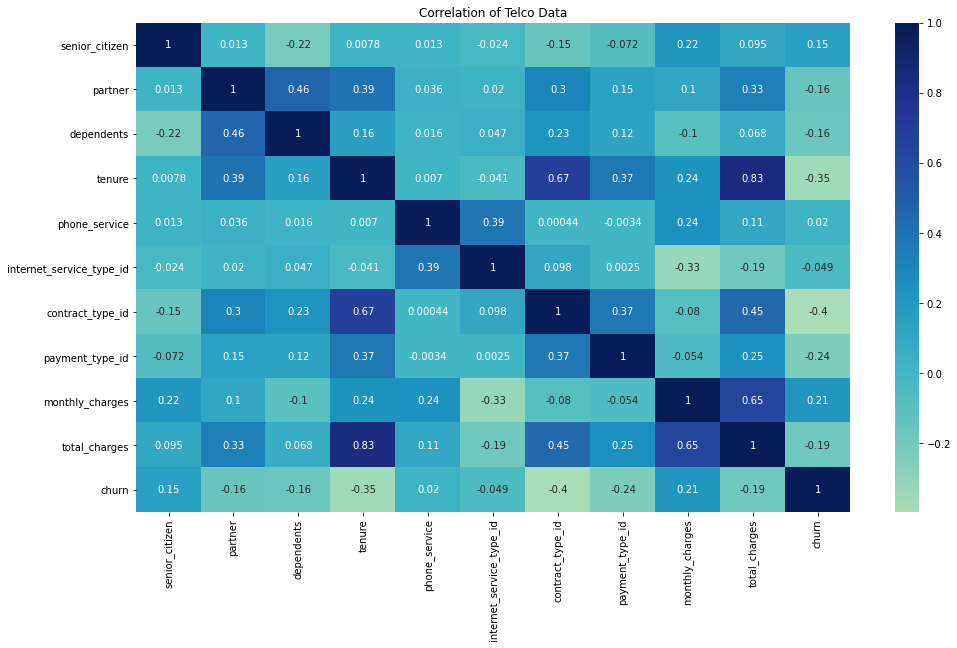

In [19]:
#heatmap to show correlation of all data
plt.figure(figsize=(16,9))

sns.heatmap(train.corr(), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Telco Data')

plt.show()

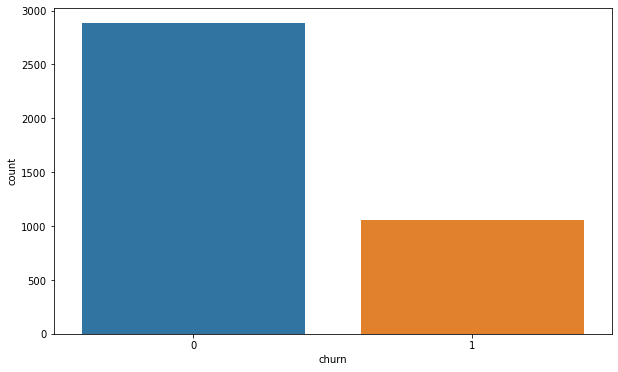

In [22]:
#visualize churn data using a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='churn', data=train)
plt.show()

In [23]:
#only using TRAIN data average monthly charges, max monthly charges, min monthly charges
train.monthly_charges.mean(), train.monthly_charges.max(), train.monthly_charges.min()

(64.61359371037278, 118.65, 18.55)

(18.25, 118.75)

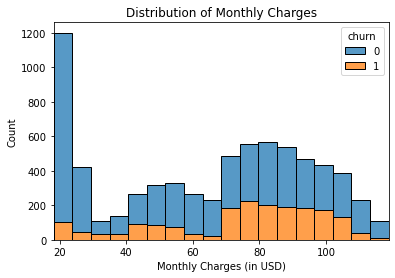

In [24]:
#visualize monthly charges with churn data
sns.histplot(data=df,
            x=df.monthly_charges,
            hue=df.churn,
            multiple='stack')

plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges (in USD)')

plt.xlim(df.monthly_charges.min(),
         df.monthly_charges.max())

In [25]:
#find out how many are senior citizens and how many are not
train.senior_citizen.value_counts()

#this shows that 16.21% of customers in the train dataset are seniors (639 out of 3943)

0    3304
1     639
Name: senior_citizen, dtype: int64

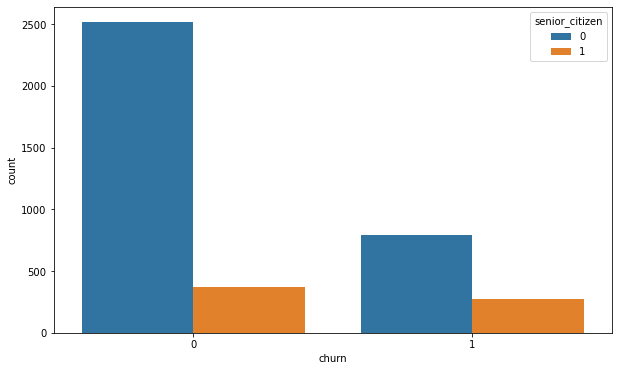

In [27]:
#this plot shows senior citizen (1) vs non-senior citizen (0)
## who churn (1) vs do not churn (0)
plt.figure(figsize=(10,6))
sns.countplot(x='churn', hue='senior_citizen', data=train)
plt.show()

In [28]:
#average tenure, max tenure, min tenure??
train.tenure.mean(), train.tenure.max(), train.tenure.min()

(32.22926705554146, 72, 0)

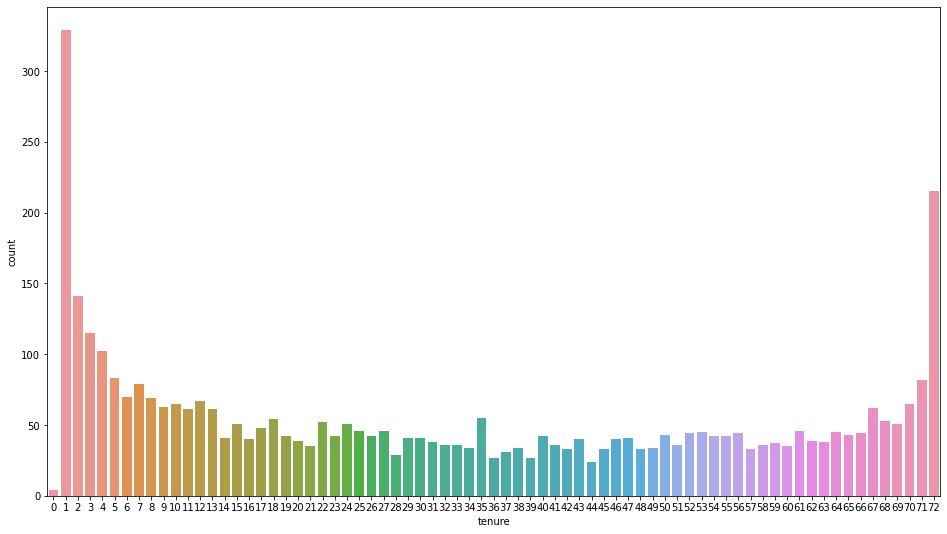

In [29]:
#visualize tenure data
plt.figure(figsize=(16,9))
sns.countplot(x='tenure', data=train)
plt.show()

## Takeaways of the Explore process:

- 7043 total customers
    - of those: 
        - 5901 are NOT senior_citizen (83.79%) while 1142 ARE senior_citizen (16.21%)
        - 5174 do NOT churn (73.46%) while 1869 DO churn (26.54%)
- Positive Correlation between churn is strongest between 'monthly_charges' and 'senior_citizen'
    - 'senior_citizen' is what interests me most to further explore/test


_______________

<hr style="border:2px solid black"> </hr>

# Model and Evaluate

Plan --- Acquire --- Prepare --- Explore --- **Model** --- Deliver

In [35]:
#get value count to determine what baseline will be equal to
train.churn.value_counts()

0    2883
1    1060
Name: churn, dtype: int64

In [36]:
#create baseline
#because the majority (in value count) was '0', we will use this as our baseline
train['baseline_pred'] = 0

In [37]:
##print statement for accuracy of baseline
baseline_accuracy = (train.churn == train.baseline_pred).mean()
print(f'The baseline accuracy is: {baseline_accuracy:.2%}')

The baseline accuracy is: 73.12%


## MVP Models
- I'm going to try Logistic Regression, DecisionTree, and RandomForest Models with
    - 'senior_citizen'
    - 'tenure'
    - 'monthly_charges'
    - 'phone_service'
- My goal is to beat my 73.12% baseline accuracy.
- Hyperparameters I've adjusted are:
    - setting the max_depth for the DecisionTree model to max_depth=5 to avoid overfitting
    - setting the.max_depth for the Random Forest Model to max_depth=10 to avoid overfitting
    - setting the random_state=123 for DecistionTree, RandomForest, and LogisticRegression models.

In [38]:
#specify columns to use
X_col= ['monthly_charges', 'senior_citizen', 'phone_service', 'tenure']
y_col= 'churn'

In [39]:
#specify train, validate, test
X_train = train[X_col]
y_train= train[y_col]

X_validate = validate[X_col]
y_validate= validate[y_col]

X_test = test[X_col]
y_test= test[y_col]

In [40]:
#get shape of sets
train.shape, validate.shape, test.shape

((3943, 25), (1691, 24), (1409, 24))

In [41]:
#shape of train set
X_train.shape, y_train.shape

((3943, 4), (3943,))

In [42]:
#take a look at X_train data
X_train.head()

,monthly_charges,senior_citizen,phone_service,tenure
4604,75.30,1,1,1
5566,19.10,0,1,71
6204,19.80,0,1,19
5837,24.15,0,1,56
1276,45.30,1,0,13


_______________________

# Evaluate MVP Models

## Logistic Regression Model 

In [43]:
#import
from sklearn.linear_model import LogisticRegression

In [44]:
#Define the logistic regression model
logit_model = LogisticRegression(C=0.1, random_state= 123)

In [45]:
#fit the model with train data 
logit_model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=123)

In [46]:
#now use the model to make predictions
y_pred = logit_model.predict(X_train)

In [47]:
print(f'training score: {logit_model.score(X_train, y_train):.2%}')
print(f'validate score: {logit_model.score(X_validate, y_validate):.2%}')

training score: 79.08%
validate score: 78.65%


### Logistic Regression Model Takeaways: 

- Logistic Regression Model has an accuracy of 79.08% using the train set
- Logistic Regression Model has an accuracy of 78.65% using the validate set
- Both are **higher** than the baseline accuracy of 73.12% 
    

___________

## Random Forest Model

In [48]:
#import
from sklearn.ensemble import RandomForestClassifier

In [49]:
#make our thing
rf_model= RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state= 123)

In [50]:
#fit the thing (ONLY on train set!!)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [51]:
print(f'training score: {rf_model.score(X_train, y_train):.2%}')
print(f'validate score: {rf_model.score(X_validate, y_validate):.2%}')

training score: 88.54%
validate score: 77.59%


### Random Forest Model Takeaways: 

- Random Forest Model has an accuracy of 88.54% using the train set
- Random Forest Model has an accuracy of 77.59% using the validate set
- Both are **higher** than the baseline accuracy of 73.12% 
- **but** the drop off is too significant to use this model (too overfit)


___________________

## Decision Tree Model

In [52]:
#create model
dt_model = DecisionTreeClassifier(max_depth=5)

In [53]:
#fit model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [54]:
print(f'training score: {dt_model.score(X_train, y_train):.2%}')
print(f'validate score: {dt_model.score(X_validate, y_validate):.2%}')

training score: 79.76%
validate score: 78.95%


### Decision Tree Model Takeaways: 

- Decision Tree Model has an accuracy of 79.36% using the train set using max_depth=5
- Decision Tree Model has an accuracy of 78.95% using the validate set using max_depth=5
- Both are **higher** than the baseline accuracy of 73.12% 


______________________________

<hr style="border:2px solid black"> </hr>

## Create CSV for Predictions

In [57]:
import prepare

In [58]:
df_all_data = prepare.prep_telco_churn(acquire.get_telco_churn_data())

In [59]:
#create column that has prediction based on decision tree model
df_all_data ['predictions'] = dt_model.predict(df_all_data[X_col])

In [60]:
#create dataframe that shows if that particular customer_id will churn of not
df_predictions = df_all_data[['customer_id', 'predictions']]

In [61]:
#take a look at this prediction data
df_predictions.head()

,customer_id,predictions
0,0016-QLJIS,0
1,0017-DINOC,0
2,0019-GFNTW,0
3,0056-EPFBG,0
4,0078-XZMHT,0


In [62]:
df_predictions.predictions.value_counts()
# based on predictions, we have 1224 customers who have the potential to churn!!

0    5819
1    1224
Name: predictions, dtype: int64

In [63]:
#turn this new dataframe of customer_id and predictions into a CSV file
df_predictions.to_csv('telco_churn_predictions.csv')

<hr style="border:2px solid black"> </hr>

<hr style="border:2px solid black"> </hr>

# Additional Content

## Best Model: Run Decision Tree Model on Test Dataset

In [55]:
import model_func

In [56]:
#use the thing
#test data set score, confusion matrix and classification report
model_func.model_performs(X_test, y_test, dt_model)


    The accuracy for our model is 78.3534%
    The True Positive Rate is 38.997%,    The False Positive Rate is 8.190%,
    The True Negative Rate is 91.810%,    The False Negative Rate is 61.003%
    ________________________________________________________________________________
    

    The positive is  'churned'
    Confusion Matrix
    


,pred_didint_churn,pred_churned
actual_didnt_churn,True Negative: 964,False positive: 86
actual_churned,False Negative: 219,True Positive: 140



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
didnt churn,0.814877,0.918095,0.863412,1050.000000
churned,0.619469,0.389972,0.478632,359.000000
accuracy,0.783534,0.783534,0.783534,0.783534
macro avg,0.717173,0.654034,0.671022,1409.000000
weighted avg,0.765089,0.783534,0.765374,1409.000000


### Decision Tree Model with Test Dataset: 

- Decision Tree Model has an accuracy of 78.70% using the **train set** using max_depth=5
- This is **higher** than the baseline accuracy of 73.12% 


<hr style="border:1px solid black"> </hr>

## statistical test 
- we are using the two following variables: churn (discrete/categorical) and senior_citizen (discrete/categorical)
- these are 2 discrete/categorical variables
<br>

- **Therefore, I will be using $\chi^2$ testing**

In [30]:
#create confusion matrix
observed = pd.crosstab(df.churn, df.senior_citizen)
observed

senior_citizen,0,1
churn,,
0,4508,666
1,1393,476


In [31]:
#set alpha
alpha = 0.05

In [32]:
#chi2 contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245,  838.94760755],
        [1565.94760755,  303.05239245]]))

In [33]:
## make it easier to read
print('Observed\n')
print(observed.values)
print('---------------------\nExpected\n')
print(expected.astype(int))
print('---------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[4508  666]
 [1393  476]]
---------------------
Expected

[[4335  838]
 [1565  303]]
---------------------

chi^2 = 159.4263
p     = 0.0000


## Hypothosis:

- **$H_{0}$**: there is no relationship between churn and customer age
<br>

- **$H_{a}$**: there is a relationshp between churn and customer age
<br>


- **True Positive**: I predict there is a relationship between churn and customer age and there is a relationship
<br>

- **True Negative**:I predict there is no relationship between churn and customer age and there is not relationship
<br>

- **False Positive**: I predict there is a relationship between churn and customer age and there is no relationship
<br>

- **False Negative**: I predict there is no relationship between churn and customer age and there is a relationship

## Further takeaways of the Explore process:

- $\chi^2$  test was used because we were dealing with two discrete variable (churn and senior_citizen)


In [34]:
print(f'The p-value is less than the alpha: {p < alpha}')

if p< alpha:
    print('Conclusion: We reject the null hypothesis')
else:
    print('Conclusion: We fail to reject the null hypothesis')

if p< alpha:
    print('Takeaways: There is a relationship between customer age and churn')
else:
    print('Takeaways: There is no relationship between customer age and churn')

The p-value is less than the alpha: True
Conclusion: We reject the null hypothesis
Takeaways: There is a relationship between customer age and churn
